# Dogrusal Olmayan Regresyon

## 1-)KNN

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

* *knn_model.n_neighbors ozelligi degistikce degerler degisir. İleride bu ozelligi optimize edecegiz*

### KNN Tahmin

In [6]:
y_pred = knn_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))
 # test hatasi

426.6570764525201

In [8]:
RMSE = []
for k in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "icin mse degeri:", rmse)

k =  1 icin mse degeri: 0.0
k =  2 icin mse degeri: 179.52761335480352
k =  3 icin mse degeri: 205.20157172291863
k =  4 icin mse degeri: 220.5139794876305
k =  5 icin mse degeri: 239.64671325413764
k =  6 icin mse degeri: 243.5904190007242
k =  7 icin mse degeri: 258.1478781634636
k =  8 icin mse degeri: 266.05374203349805
k =  9 icin mse degeri: 269.73782093553376


### KNN Model Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
knn_params = {'n_neighbors':np.arange(1,30,1)}
# denenecek olan parametreleri uretildi
# key degeri uygulamanin kabul ettigi algoritma adi olmali

* *GridSearch kendisine verilen degerleri kombinasyonlarini kontrol eder*

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# 1. prmtre model, 2. denenecek olan parametreler, 3. ise islemin kat sayisi

In [13]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [14]:
knn_cv_model.best_params_["n_neighbors"]
# en iyi k parametresi boylece bulunmus oldu

8

* *Test hatalari her zaman valide edilmis model uzerinden degerlendirilmelidir.*

In [15]:
knn_last = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"] )
# en uygun k parametresiyle olusturuldu

In [16]:
knn_last.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [17]:
np.sqrt(mean_squared_error(y_test, knn_last.predict(X_test)))

413.7094731463598

# 2-)SVR

In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [20]:
from sklearn.svm import SVR

In [21]:
svr_model = SVR("linear").fit(X_train,y_train)
# "linear" keyword

In [22]:
svr_model.predict(X_train)[0:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [23]:
print(" y = {0} + {1}x ".format(svr_model.intercept_[0],
                               svr_model.coef_[0][0]))

 y = -48.69756097561513 + 4.969512195122093x 


In [24]:
X_train[0:1]

,Hits
183,91.0


In [25]:
-48.69756097561513 + 4.969512195122093 * 91

403.5280487804953

In [26]:
svr_model.predict(X_train)[0:1]

array([403.52804878])

In [27]:
y_pred = svr_model.predict(X_train)

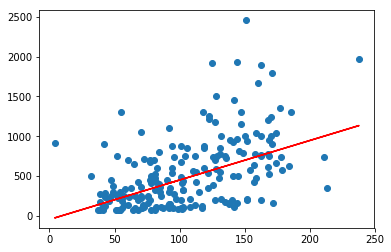

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r")

In [29]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [30]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

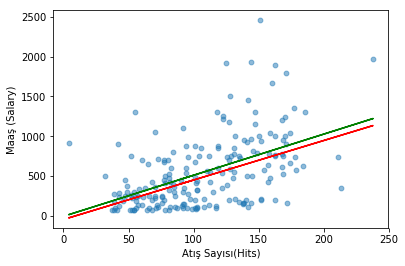

In [31]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

* *Basit SVR tahmini 403.5 , Linear tahmini ise 461.8 aradaki fark ayrık gozlemler sebebinden. SVR, Linear modele gore ayrik verilerden daha az etkilenir. Yuksek degerli aykiri gozlemler modeli yukariya ceker.*

### SVR Tahmin

In [32]:
y_pred = svr_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test hatasi

459.0187960365147

In [34]:
svr_model

SVR(kernel='linear')

### SVR Model Tuning

In [35]:
svr_model

SVR(kernel='linear')

* *Yukaridaki C parametresi karmasiklik parametresidir bununla oynayip modeli gelistirecegiz*

In [36]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
# baslangic bitis ve arama araligi parametreleri verildi

In [37]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv =10).fit(X_train, y_train)
# svr_model, svr_params kullanilarak 10 katli bir gridsearch yapacak sonrasinde direkt fit edecek

In [38]:
svr_cv_model.best_params_

{'C': 0.1}

In [39]:
c = pd.Series(svr_cv_model.best_params_)[0]
# asagiya direkt parametre verebilmek icin bu duzene getirdik

In [40]:
svr_tuned = SVR("linear", C = c).fit(X_train, y_train)

In [41]:
y_pred = svr_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

* *İstersek svr_tuned olusturmak yerine svr_cv_modeli de kullanabilirdik cunku svr_cv_model calisinca en dogru parametre degerini kendi atar bizim svr_tuned'deki gibi parametre vermemize ihtiyac duymaz*

## 2a-) Dogrusal Olmayan SVR

In [44]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [45]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
# dogrusal olmayan SVR modeli

### Tahmin

In [46]:
y_pred = svr_rbf.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

In [48]:
svr_rbf

SVR()

* *C parametresi optimize edilecek*

In [49]:
svr_params = { "C": [0.1, 0.4, 5, 10 ,20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [50]:
svr_cv_model.best_params_
 # optimum c bulundu

{'C': 50}

In [51]:
best_c = pd.Series(svr_cv_model.best_params_)[0]

In [52]:
svr_tuned = SVR("rbf", C = best_c).fit(X_train, y_train)

In [53]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

## 3-) Yapay Sinir Aglari

In [54]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [57]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.neural_network import MLPRegressor

In [59]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100, 20)).fit(X_train_scaled, y_train)

In [60]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [61]:
mlp_model.n_layers_
# genel framework

4

In [62]:
mlp_model.hidden_layer_sizes

(100, 20)

### Tahmin


In [63]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 77.76334398, 406.4832663 , 257.37379433,  68.62886888,
        60.49784785])

In [64]:
y_pred = mlp_model.predict(X_test_scaled)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

451.53797823894183

### Model Tuning

In [66]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

* *Hidden_layer_size parametresi hangi katmanda kac notorn olacagini belirler.*
* *(100,20) dendiginde ilk katmanda 100 ikinci katmanda 20 noron belirler*

In [67]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             "activation": ["relu", "logistic"]}

In [68]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [69]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [70]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [71]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300, 200, 150), activation = "relu")
# yukarida buldugumuz iyi parametrelerle ayarlanmıis modeli kurduk

In [72]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(300, 200, 150))

In [73]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.13868606447875

## Regresyon Agaclari (CART)

* Amac veri seteindeki karmasik yapilari basit kara yapilarina donusturmek

* Heterojen veri setleri belirlenmis bir hedef degiskene gore homojen alt gruplara ayrilir.
* Asiri dallanma overfittinge sebep olabilir.
* Karmasiklik parametresi(ceza parametresi) belirlenip agaclarin dallari budanir bu sayede overfitting engellenmis olur.
* Genellenebilirlik kaygisi yok ise uygulanmasi basarili sonuclar dogurur.


In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [76]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

* Eksenlerdeki durumu gormek icin once degisken bazinda inceleriz

In [77]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 3)

In [78]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=3)

In [79]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

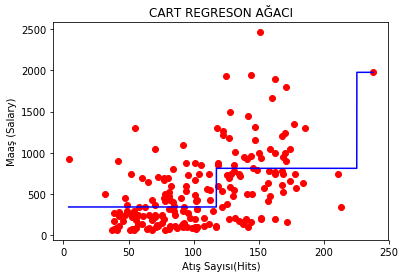

In [80]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

* Dallanmalar bu sekilde gorsellestirilebilir. max_leaf_nodes sayisi bu gorseli etkiler. Bu parametrenin optimumunu bulmaya calisiriz.

## Tahmin

In [81]:
cart_model.predict([[91]]) #girilen sayinin ciktisi

array([345.20115517])

In [82]:
y_pred = cart_model.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

## Model Tuning

* max_leaf_nodes, min_sample_split parametrelerini optimize ederiz

In [84]:
cart_params = {"min_samples_split": range(2,20),
         "max_leaf_nodes": range(2,10)}

In [85]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [86]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=3),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 20)})

In [87]:
cart_cv_model.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [88]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 2, min_samples_split =  2)

In [89]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=2)

In [90]:
y_pred = cart_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

462.4884294447576

# Bagged Trees

* Bootstrap yontemi ile olusturulan birden fazla kara agacinin urettigi tahminleri bir araya getirerek degerlendirir

* Agaclar birbirinden bagimsizdir

## Model

In [92]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [93]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

* bootstrap_features default degeri False. True ile bootstrap ornekleri gozlemlenebilir.
* n_estimators: olusturulacak  agac sayisi

In [94]:
bag_model.estimators_ # agaclar hakkinda bilgi

[DecisionTreeRegressor(random_state=1117117585),
 DecisionTreeRegressor(random_state=1129887359),
 DecisionTreeRegressor(random_state=1673310286),
 DecisionTreeRegressor(random_state=1398640533),
 DecisionTreeRegressor(random_state=1905806613),
 DecisionTreeRegressor(random_state=1915710781),
 DecisionTreeRegressor(random_state=559529017),
 DecisionTreeRegressor(random_state=1692996620),
 DecisionTreeRegressor(random_state=1736863429),
 DecisionTreeRegressor(random_state=1505834257)]

In [95]:
bag_model.estimators_samples_ # her bir agacin ornekleri

[array([131,  31, 171,  62, 139, 123, 188, 126, 185,  21, 153, 171,  97,
        123,  58, 148,  97, 177, 121, 121,   8,  31,  70,  24, 139,  69,
          7,  86,  73, 105,  36, 177, 190, 139, 117,  25,  39,  32,  91,
         98,  69,   4,  90, 144,  69, 192,  78, 162,  71,  59, 115,  10,
        104, 172,  78,  69, 177,  58,   3,  78,   9,  71,  72, 137, 104,
         74,  64,  97,  61,  53, 102, 187, 116,  70,  40, 151,  86, 125,
        180, 104,  27, 149,  41, 191,  87,  98, 179, 195,  26,  65, 175,
        179,  41, 194, 132, 134,  46, 156,  51,  65,  55, 121,  76,   5,
        157, 111,  11, 122,  27, 184, 125, 139,  39,   6,  74,  43, 161,
        121, 143, 132,  57, 161,  57,  51,  11,  82,  67, 157,  79, 107,
         31, 147, 180,  59,  64, 150,  62,  99, 178, 159, 141,  84, 157,
        117, 100,  98, 133,  30, 176, 153, 113, 144, 101, 157,  77,  81,
         38, 189,  82, 113, 157,  57,  35, 106, 116, 117,  39,  61,  28,
        181, 193,  72,  22,  50, 102, 116,  71,  45

In [96]:
bag_model.estimators_features_ # agaclarin degiskenleri

[array([17,  6, 10,  9,  1,  6, 11,  6,  5,  6, 15, 14,  6,  9,  6, 17,  8,
         4, 15]),
 array([14, 14,  8, 11,  9,  7, 17, 17, 14, 13,  9, 18, 16, 13,  9, 18, 15,
        10,  3]),
 array([14,  3, 12,  6,  4, 18, 10, 15,  5,  2,  8,  9, 12, 10, 13, 10,  2,
         3,  7]),
 array([12,  6,  8,  3, 12,  3, 10, 17, 13, 10, 15,  0, 16, 12, 18, 16, 18,
        18, 15]),
 array([12,  7, 12, 11,  9, 15, 15, 11, 10,  2, 16, 13, 18,  7,  5, 12, 10,
        10,  8]),
 array([16, 15,  9, 14, 12, 10, 12, 10, 17, 16, 11,  2,  0,  6,  2, 11, 15,
         6,  6]),
 array([ 1,  0,  5,  1,  3, 15, 16, 10, 16,  2,  9,  3,  3,  1,  8, 15,  4,
        18, 15]),
 array([12,  5,  9,  9,  1,  2,  6,  6, 13,  8, 15, 16, 10, 16, 11, 14, 13,
        17,  7]),
 array([ 5, 18,  0,  6,  5, 17,  1, 16, 10,  7, 11,  4,  7, 12, 14,  9,  1,
         9,  5]),
 array([17, 12, 11,  8,  3, 10,  6,  8,  6, 18,  8, 16, 11,  5, 13, 18,  9,
        11, 15])]

In [97]:
bag_model.estimators_[0] # modeller arasinda inceleme

DecisionTreeRegressor(random_state=1117117585)

## Tahmin

In [98]:
y_pred = bag_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.74206231939723

* Bu deger olusturulan her agacin tahminlerine bakilarak olusturulan bir degerdi. Agaclar bazinda inceleme yapabiliriz

In [100]:
ikinci_agac_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test, ikinci_agac_pred))

451.5091307112586

* İkinci agac ile kurulan modelin hatasini hesaplariz

## Model Tuning

In [102]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [103]:
bag_params = {"n_estimators": range(2,30)}

In [104]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [105]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 30)})

In [106]:
bag_cv_model.best_params_

{'n_estimators': 22}

In [107]:
bag_tuned = BaggingRegressor(n_estimators = 8)

In [108]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=8)

In [109]:
y_pred = bag_tuned.predict(X_test)

In [110]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.72724377535405

# Random Forests RF

* Birden cok agacin urettiği tahminlerin bir araya getirelerek degerlendirir

* Degiskenler random subspace secilir
* Agac olusturmada verinin 2/3u kullanilir.
* Her dugum noktasinda rastgele degisken secimi yapirir.
* Sonunda her agactan tahmin degeri alinirken agaclarin daha önceki hata degerleri goz onune alinarak onlara bir agirlik atanir.

In [111]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf_model = RandomForestRegressor(random_state = 42)

In [114]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [115]:
rf_model

RandomForestRegressor(random_state=42)

## Tahmin

In [116]:
y_pred = rf_model.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## Model Tuning

In [118]:
rf_params = {"max_depth": list(range(1,10)),
            "max_features": [3,5,10,15],
            "n_estimators": [100, 200, 500, 1000, 2000]}

In [119]:
rf_model = RandomForestRegressor(random_state = 42)

In [120]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)

* n_jobs parametresi -1 olunca, paralel eszamanli yapilacak isleri de devreye alir ve islemcilerin tam performansli kullanilmasini saglar. Cunku RF algoritmasinin calisma mantigi bu parametrelerle zaten yuksek islem gerektirir bir de cok katli gridsearch yapinca bu yuk cok daha fazla artar.

In [121]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [122]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [123]:
rf_tuned = RandomForestRegressor(max_depth = 8,
                                max_features = 3,
                                n_estimators = 100)

In [124]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3)

In [125]:
y_pred = rf_tuned.predict(X_test)

In [126]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.10445588035634

In [127]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns
                         )

Text(0.5, 0, 'degisken onem duzeyi')

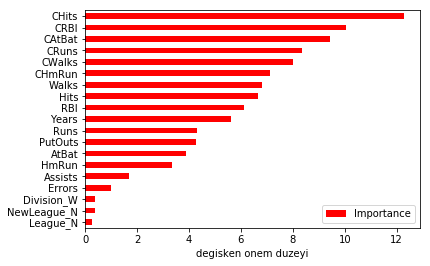

In [128]:
importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("degisken onem duzeyi")

* Degiskenlerin bagimli degiskene etkileri gorsellestirmesi

# Gradient Boosting Machines (GBM)

* AdaBoostun siniflandirma ve regresyon problemlerine kolayca uyarlanan genellestirilmis versiyon

* Artiklar uzerine tek bir tahminsel model formunda olan modeller serisi kurulur

* AdaBoost : Zayif siniflandiricilarin bir araya gelerek guclu bir siniflandirici olusturulmasidir.

* Gradient boosting tek bir tahminsel model formunda olan modeller serisi olusturur
* Seri icerisindeki model, serideki onceki modelin tahmin artiklarinin/hatalarinin uzerine kurulur.
* GBM diferansiyellenebilen herhangi bir kayip fonksiyonunu optimize edebilen Gradien Descent algoritmasini kullanir
* cost ve link fonksiyonlariyla modifiye edilebilir
* Boosting + Gradient Descent

## Model

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

In [130]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [131]:
y_pred = gbm_model.predict(X_test)


In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.68198478217533

## Model Tuning

In [133]:
gbm_params = {
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8, 50, 100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.5, 0.75]
}

In [134]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [135]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.5}

In [136]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2, 
                                      max_depth = 8, 
                                      n_estimators = 200, 
                                      subsample = 0.5).fit(X_train, y_train)


In [137]:
y_pred = gbm_tuned.predict(X_test)

In [138]:
np.sqrt(mean_squared_error(y_test, y_pred))

339.01240843477973

In [139]:
importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = X_train.columns
                         )

Text(0.5, 0, 'degisken onem duzeyi')

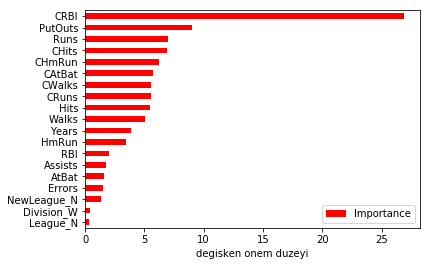

In [140]:
importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("degisken onem duzeyi")

#  XGBoost

* XGBoost, GBM'in hiz ve tahmin performansini arttirmak uzere ptimize edilmistir.
* Olceklenebilir ve farkli platformlara entegre edilebilir halidir.

## Model

In [141]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [142]:
!pip install xgboost

* Gelistirici XGBoost icin dataframe kullanmak yerine XGBoost'un kendi veri yapisi kullanilmasi durumunda daha performansli bir model elde edecegimizi soyler.Asagidaki gibi olusturulur.

In [143]:
import xgboost as xgb

In [144]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [145]:
from xgboost import XGBRegressor

In [146]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [147]:
y_pred = xgb_model.predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [149]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
xgb_param = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.5]
}

In [151]:
xgb = XGBRegressor()
xgb_cv_model = GridSearchCV(xgb, 
                            xgb_param, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [152]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [153]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, 
                         learning_rate = 0.1,
                         max_depth = 2, 
                         n_estimators = 500 ).fit(X_train, y_train)

In [154]:
y_pred = xgb_tuned.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275204366939

# LightGbm

* XGBoost'un egitim performansini arttirmaya yonelik gelistirilen bir diger GBM turudur.

* Daha performasli
* Level-wise buyume stratejisi yerine Leaf-wise buyume stratejisi izler
* Breadth-first search (BFS) yerine depth-first search (DFS) kullanir

* LightGbm'in, XGBoost'un egitim suresini kisaltmak icin split etmeye odaklanir.

* XGboost daha genis kapsamli bir ilk arama yapar, LighGBM ist derinlemesine bir ilk arama yapar

## Model

In [156]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [157]:
!pip install lightgbm

In [158]:
from lightgbm import LGBMRegressor

In [159]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [160]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)

In [161]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [162]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [163]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [164]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [165]:
lgbm_tuned = LGBMRegressor(colsample_bytree = 0.5, 
                           learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20).fit(X_train, y_train)

In [166]:
y_pred = lgbm_tuned.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CatBoost

* Kategorik degiskenlerle otomatik mucadele edebilen, hizli basarili bir GBM turevi

* Hizli ve olceklenebilir GPU destegi
* Daha basarili tahminler
* Hizli train hizli tahmin


## Tahmin

In [168]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [169]:
!pip install catboost

In [170]:
from catboost import CatBoostRegressor

In [171]:
catB = CatBoostRegressor()
catB_model = catB.fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 142ms	remaining: 2m 21s
1:	learn: 432.4168868	total: 143ms	remaining: 1m 11s
2:	learn: 426.3836690	total: 148ms	remaining: 49.2s
3:	learn: 420.2261014	total: 151ms	remaining: 37.6s
4:	learn: 414.9976675	total: 153ms	remaining: 30.5s
5:	learn: 409.6125323	total: 155ms	remaining: 25.7s
6:	learn: 403.9277911	total: 157ms	remaining: 22.2s
7:	learn: 398.4395285	total: 160ms	remaining: 19.9s
8:	learn: 392.4517081	total: 162ms	remaining: 17.8s
9:	learn: 387.4871123	total: 163ms	remaining: 16.2s
10:	learn: 382.6230510	total: 165ms	remaining: 14.8s
11:	learn: 378.1012454	total: 167ms	remaining: 13.7s
12:	learn: 372.6002306	total: 168ms	remaining: 12.8s
13:	learn: 368.4682192	total: 170ms	remaining: 11.9s
14:	learn: 364.0565766	total: 171ms	remaining: 11.2s
15:	learn: 359.5683249	total: 174ms	remaining: 10.7s
16:	learn: 355.1782794	total: 177ms	remaining: 10.2s
17:	learn: 350.4689946	total: 179ms	remaining: 9.76s
18:	learn: 346.2553348	t

In [172]:
y_pred = catB_model.predict(X_test)

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning

In [174]:
catB_grid = {
    'iterations': [200, 500, 1000, 2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8]
}

In [175]:
catB_cv_model = GridSearchCV(catB, catB_grid, cv = 5, n_jobs = -1, verbose = 2)

In [177]:
catB_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 1.26ms	remaining: 1.26s
1:	learn: 404.1864276	total: 2.24ms	remaining: 1.12s
2:	learn: 386.3231718	total: 3.15ms	remaining: 1.05s
3:	learn: 370.5548032	total: 4.12ms	remaining: 1.02s
4:	learn: 354.9242038	total: 5.14ms	remaining: 1.02s
5:	learn: 342.3403984	total: 6.16ms	remaining: 1.02s
6:	learn: 328.2370070	total: 7.17ms	remaining: 1.02s
7:	learn: 317.5056526	total: 8.12ms	remaining: 1.01s
8:	learn: 306.6243511	total: 9.13ms	remaining: 1s
9:	learn: 297.3147023	total: 10.2ms	remaining: 1.01s
10:	learn: 288.3685892	total: 11.2ms	remaining: 1.01s
11:	learn: 281.0996220	total: 12.2ms	remaining: 1.01s
12:	learn: 273.2254898	total: 13.2ms	remaining: 1s
13:	learn: 266.9003385	total: 14.2ms	remaining: 1s
14:	learn: 261.9092500	total: 15.2ms	remaining: 997ms
15:	learn: 256.2637350	total: 16.1ms	remaining: 992ms
16:	learn: 250.3667935	total: 17.2ms	remaining: 993ms
17:	learn: 244.8631098	total: 18.4ms	re

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D2B29D0400>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [178]:
catB_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [179]:
catB_tuned = CatBoostRegressor(depth = 5, 
                               iterations = 1000, 
                               learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 422.4143448	total: 1.92ms	remaining: 1.92s
1:	learn: 404.1864276	total: 3.1ms	remaining: 1.54s
2:	learn: 386.3231718	total: 4.06ms	remaining: 1.35s
3:	learn: 370.5548032	total: 4.96ms	remaining: 1.24s
4:	learn: 354.9242038	total: 5.81ms	remaining: 1.16s
5:	learn: 342.3403984	total: 6.72ms	remaining: 1.11s
6:	learn: 328.2370070	total: 7.67ms	remaining: 1.09s
7:	learn: 317.5056526	total: 8.63ms	remaining: 1.07s
8:	learn: 306.6243511	total: 9.72ms	remaining: 1.07s
9:	learn: 297.3147023	total: 10.6ms	remaining: 1.05s
10:	learn: 288.3685892	total: 11.6ms	remaining: 1.05s
11:	learn: 281.0996220	total: 12.7ms	remaining: 1.04s
12:	learn: 273.2254898	total: 13.6ms	remaining: 1.03s
13:	learn: 266.9003385	total: 14.6ms	remaining: 1.03s
14:	learn: 261.9092500	total: 15.5ms	remaining: 1.02s
15:	learn: 256.2637350	total: 16.5ms	remaining: 1.01s
16:	learn: 250.3667935	total: 17.3ms	remaining: 1s
17:	learn: 244.8631098	total: 18.3ms	remaining: 997ms
18:	learn: 240.1540669	total: 19.1ms	remai

In [180]:
y_pred = catB_tuned.predict(X_test)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.665762904938